<a href="https://colab.research.google.com/github/Savaliyaniks1/Project_5/blob/main/Engagement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***2 - Engagement Analysis***

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv(r'/content/Overview Analysis.csv')

In [ ]:
data.head(2)

,MSISDN/Number,Handset Type,Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Application,Bearer Id,Dur. (ms)
0,3.366447e+10,Huawei B593S-22,535118044.0,33691738.0,Huawei,Email,1.311448e+19,104687.0
1,3.365875e+10,Huawei E5180,422406937.0,26026033.0,Huawei,Email,1.304243e+19,104687.0


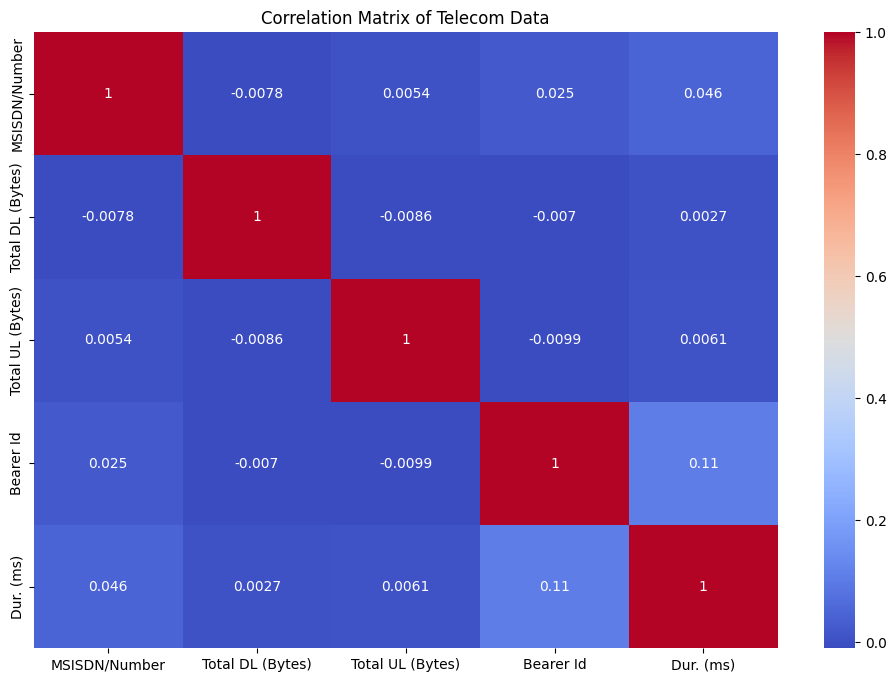

In [ ]:
# Calculate the correlation matrix, excluding non-numerical columns
corr_matrix = data.select_dtypes(include=['number']).corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Telecom Data')
plt.show()


In [ ]:
data = data.rename(columns={'Bearer Id': 'Sessions_Frequency'})


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17558 entries, 0 to 17557
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSISDN/Number         17558 non-null  float64
 1   Handset Type          17558 non-null  object 
 2   Total DL (Bytes)      17558 non-null  float64
 3   Total UL (Bytes)      17558 non-null  float64
 4   Handset Manufacturer  17558 non-null  object 
 5   Application           17558 non-null  object 
 6   Sessions_Frequency    17558 non-null  float64
 7   Dur. (ms)             17558 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


# Find total session traffic

In [ ]:
# find the session_total_traffic.

data['session_total_traffic'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

# Calculate the engagement metrics

In [ ]:
data['engagement_score'] = (data['Sessions_Frequency'] * data['Dur. (ms)'] * data['session_total_traffic']) / 1000000000  # Normalize the score

# Display the updated DataFrame
print(data[['Sessions_Frequency', 'Dur. (ms)', 'session_total_traffic', 'engagement_score']].head())


   Sessions_Frequency  Dur. (ms)  session_total_traffic  engagement_score
0        1.311448e+19   104687.0            568809782.0      7.809280e+23
1        1.304243e+19   104687.0            448432970.0      6.122780e+23
2        1.304243e+19   104687.0            143937207.0      1.965279e+23
3        1.304243e+19   104687.0            226300149.0      3.089840e+23
4        1.304243e+19   104687.0            552665938.0      7.545948e+23


# Aggregate the above metrics per customer ID (MSISDN) and report the top 10 customers per engagement metric

In [ ]:
# Aggregate metrics per customer ID
customer_engagement = data.groupby('MSISDN/Number').agg({
    'Sessions_Frequency': 'sum',
    'Dur. (ms)': 'sum',
    'session_total_traffic': 'sum',
    'engagement_score': 'sum'
})

# Top 10 customers per engagement metric
top_10_engagement = customer_engagement.sort_values(by='engagement_score', ascending=False).head(10)

In [ ]:
top_10_engagement.head()

,Sessions_Frequency,Dur. (ms),session_total_traffic,engagement_score
MSISDN/Number,,,,
3.375690e+10,3.314687e+22,248466892.0,1.514752e+12,1.303018e+27
3.365955e+10,9.129698e+19,696233.0,4.612115e+09,5.933945e+24
3.366258e+10,7.825456e+19,518397.0,3.727879e+09,4.200799e+24
3.366180e+10,7.825456e+19,518395.0,3.725833e+09,4.198471e+24
3.369925e+10,7.825456e+19,515573.0,3.752679e+09,4.196761e+24


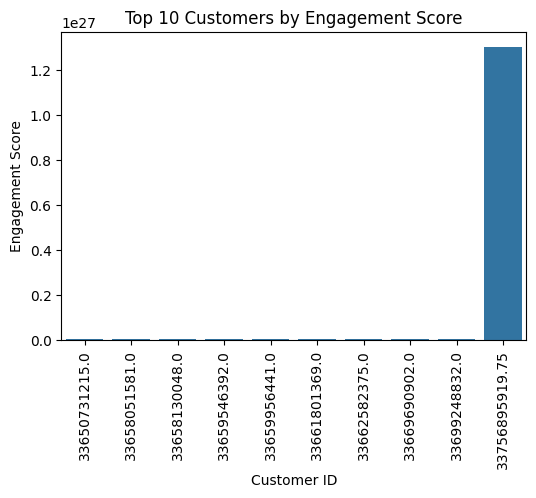

In [ ]:
# visualize the interpretation

plt.figure(figsize=(6,4))
sns.barplot(x=top_10_engagement.index, y='engagement_score', data=top_10_engagement.reset_index())
plt.xlabel('Customer ID')
plt.ylabel('Engagement Score')
plt.title('Top 10 Customers by Engagement Score')
plt.xticks(rotation=90)
plt.show()

# 	Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

In [ ]:
# Select the features for clustering
features = customer_engagement[['Sessions_Frequency', 'Dur. (ms)', 'session_total_traffic', 'engagement_score']]

# Scale the data

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# Assuming you found the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
customer_engagement['cluster_labels'] = kmeans.fit_predict(scaled_features)

# Display the updated DataFrame with cluster labels
print(customer_engagement.head())

               Sessions_Frequency  Dur. (ms)  session_total_traffic  \
MSISDN/Number                                                         
3.360101e+10         7.277826e+18    55919.0            871832580.0   
3.360103e+10         7.277826e+18    55919.0            637053075.0   
3.360105e+10         7.349883e+18    59569.0            445397764.0   
3.360106e+10         7.277826e+18    55919.0            769716233.0   
3.360108e+10         7.277826e+18    55919.0            458958083.0   

               engagement_score  cluster_labels  
MSISDN/Number                                    
3.360101e+10       3.548086e+23               0  
3.360103e+10       2.592607e+23               0  
3.360105e+10       1.950064e+23               0  
3.360106e+10       3.132504e+23               0  
3.360108e+10       1.867816e+23               0  


# Compute the minimum, maximum, average & total non-normalized metrics for each cluster.

In [ ]:
# prompt: ●	Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

# Assuming 'cluster_labels' is a column in your DataFrame containing the cluster assignments
# If not, you'll need to add the cluster labels to your DataFrame first.

# Calculate the minimum, maximum, average, and total non-normalized metrics for each cluster
cluster_stats = customer_engagement.groupby('cluster_labels').agg({
    'Sessions_Frequency': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'session_total_traffic': ['min', 'max', 'mean', 'sum']
})

# Display the results
print(cluster_stats)

               Sessions_Frequency                                            \
                              min           max          mean           sum   
cluster_labels                                                                
0                    6.917538e+18  3.912728e+19  1.090256e+19  1.114460e+23   
1                    3.314687e+22  3.314687e+22  3.314687e+22  3.314687e+22   
2                    1.455565e+19  9.129698e+19  3.947259e+19  4.215672e+22   

                  Dur. (ms)                                          \
                        min          max          mean          sum   
cluster_labels                                                        
0                   55919.0     259278.0  8.557038e+04  874700383.0   
1               248466892.0  248466892.0  2.484669e+08  248466892.0   
2                  111838.0     696233.0  2.680146e+05  286239571.0   

               session_total_traffic                                            
                 

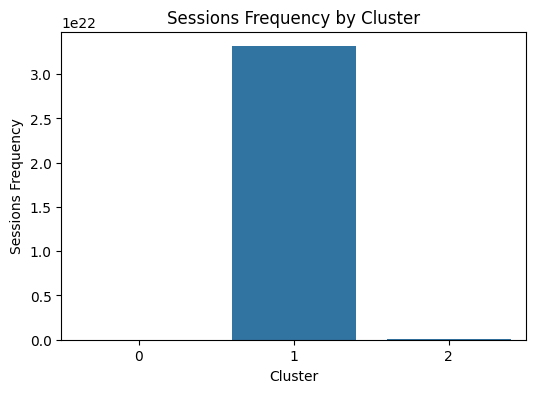

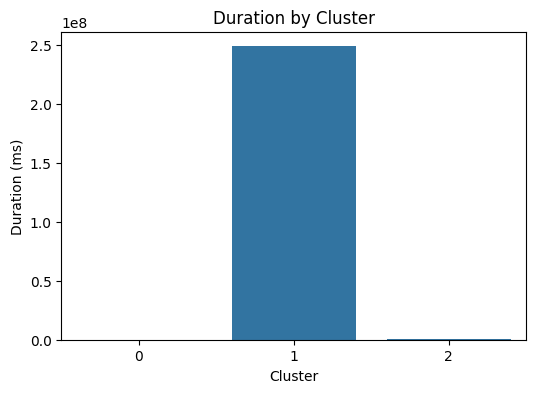

Text(0.5, 1.0, 'Total Traffic by Cluster')

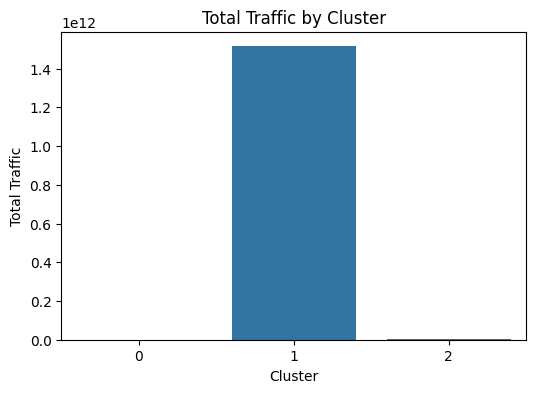

In [ ]:
# Visulize the result

# for Sessions frequency

plt.figure(figsize=(6,4))
sns.barplot(x='cluster_labels', y='Sessions_Frequency', data=customer_engagement)  # Use 'cluster_labels' as a string to reference the column
plt.xlabel('Cluster')
plt.ylabel('Sessions Frequency')
plt.title('Sessions Frequency by Cluster')
plt.show()

# for Duration

plt.figure(figsize=(6,4))
sns.barplot(x='cluster_labels', y='Dur. (ms)', data=customer_engagement)
plt.xlabel('Cluster')
plt.ylabel('Duration (ms)')
plt.title('Duration by Cluster')
plt.show()

# for session total traffic

plt.figure(figsize=(6,4))
sns.barplot(x='cluster_labels', y='session_total_traffic', data=customer_engagement)
plt.xlabel('Cluster')
plt.ylabel('Total Traffic')
plt.title('Total Traffic by Cluster')

# The top 3 most used applications

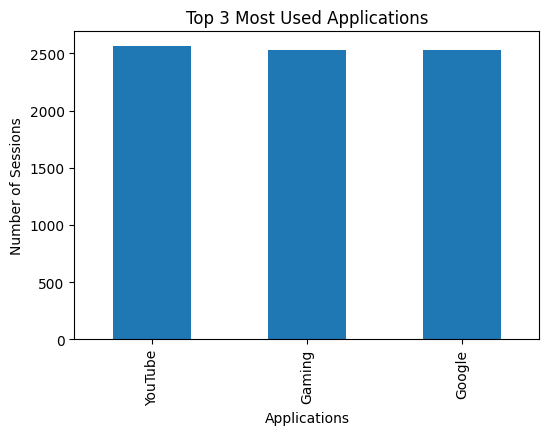

In [ ]:
# Group by 'Application' and count occurrences

top_apps = data['Application'].value_counts().nlargest(3)

# Create a bar plot
plt.figure(figsize=(6, 4))
top_apps.plot(kind='bar')
plt.xlabel('Applications')
plt.ylabel('Number of Sessions')
plt.title('Top 3 Most Used Applications')
plt.show()


# Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics

In [ ]:
# Determine the optimal number of clusters using the Elbow method

inertia = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

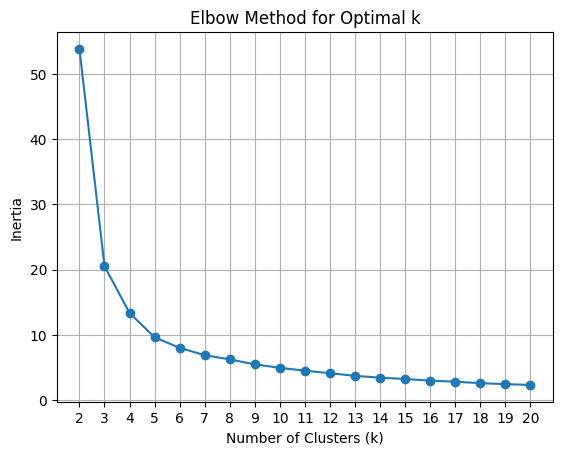

In [ ]:
# Plot the Elbow method graph

plt.plot(range(2, 21), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()


In [ ]:
data.head()

,MSISDN/Number,Handset Type,Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Application,Sessions_Frequency,Dur. (ms),session_total_traffic,engagement_score
0,3.366447e+10,Huawei B593S-22,535118044.0,33691738.0,Huawei,Email,1.311448e+19,104687.0,568809782.0,7.809280e+23
1,3.365875e+10,Huawei E5180,422406937.0,26026033.0,Huawei,Email,1.304243e+19,104687.0,448432970.0,6.122780e+23
2,3.366274e+10,Samsung Galaxy A8 (2018),93360974.0,50576233.0,Samsung,Others,1.304243e+19,104687.0,143937207.0,1.965279e+23
3,3.366917e+10,Samsung Galaxy S9 Plus (Sm-G965F),193656366.0,32643783.0,Samsung,Netflix,1.304243e+19,104687.0,226300149.0,3.089840e+23
4,3.366555e+10,Huawei B528S-23A,519351173.0,33314765.0,Huawei,Gaming,1.304243e+19,104687.0,552665938.0,7.545948e+23


In [ ]:
data.to_csv('Engagement_Analysis.csv', index=False)